In [82]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from fbprophet import Prophet
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Import the CSV data into pandas dataframes

btc_df = pd.read_csv(Path('data/BTC_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
eth_df = pd.read_csv(Path('data/ETH_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
ada_df = pd.read_csv(Path('data/ADA_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
ltc_df = pd.read_csv(Path('data/LTC_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)

# Check the first 5 rows of each dataframe
display(btc_df.head())
display(eth_df.head())
display(ada_df.head())
display(ltc_df.head())

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-09-30,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-01,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-02,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-03,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-04,BTC,121.33866,118.67466,121.93633,118.00566


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-08,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-09,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-10,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-11,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-12,ETH,1.266023,0.850151,1.266023,0.850151


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,ADA,0.218973,0.224155,0.224991,0.216746
2018-06-01,ADA,0.219180,0.223207,0.227988,0.213887
2018-06-02,ADA,0.227665,0.220317,0.228962,0.216588
2018-06-03,ADA,0.226597,0.226565,0.236650,0.222872
2018-06-04,ADA,0.213313,0.226409,0.230272,0.209228


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


In [84]:
# Review the data types of the DataFrame using the info function
btc_df.info()
eth_df.info()
ada_df.info()
ltc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2838 entries, 2013-09-30 to 2021-07-07
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2838 non-null   object 
 1   Closing Price (USD)  2838 non-null   float64
 2   24h Open (USD)       2838 non-null   float64
 3   24h High (USD)       2838 non-null   float64
 4   24h Low (USD)        2838 non-null   float64
dtypes: float64(4), object(1)
memory usage: 133.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2161 entries, 2015-08-08 to 2021-07-07
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2161 non-null   object 
 1   Closing Price (USD)  2161 non-null   float64
 2   24h Open (USD)       2161 non-null   float64
 3   24h High (USD)       2161 non-null   float64
 4   24h Low (USD)        2161 non-null   float6

In [85]:
# Filter the data index and Closing Price (USD) 
btc_sliced_df = btc_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
eth_sliced_df = eth_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
ada_sliced_df = ada_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
ltc_sliced_df = ltc_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
display(btc_sliced_df.head())
display(eth_sliced_df.head())
display(ada_sliced_df.head())
display(ltc_sliced_df.head())

,Closing Price (USD)
Date,
2018-05-31,7490.621250
2018-06-01,7518.333329
2018-06-02,7630.403388
2018-06-03,7716.145068
2018-06-04,7505.589277


,Closing Price (USD)
Date,
2018-05-31,570.865740
2018-06-01,577.257364
2018-06-02,591.381123
2018-06-03,618.302767
2018-06-04,591.549075


,Closing Price (USD)
Date,
2018-05-31,0.218973
2018-06-01,0.219180
2018-06-02,0.227665
2018-06-03,0.226597
2018-06-04,0.213313


,Closing Price (USD)
Date,
2018-05-31,117.475053
2018-06-01,119.934676
2018-06-02,123.222694
2018-06-03,125.365456
2018-06-04,119.522003


### Forecasting

## Step 1: Prepare the data to fit the Prophet model. Create four new Data Frames: one for each asset. Recall setting the column names to "ds" for the dates and "y" for the trend values.

In [86]:
# Create a DataFrame for Bitcoin, reset index and rename the columns to the Prophet model syntax
btc_rename_df = btc_sliced_df.reset_index()
btc_rename_df = btc_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
btc_rename_df.head() 

,ds,y
0,2018-05-31,7490.621250
1,2018-06-01,7518.333329
2,2018-06-02,7630.403388
3,2018-06-03,7716.145068
4,2018-06-04,7505.589277


In [87]:
# Create a DataFrame for Ethereum, reset index and rename the columns to the Prophet model syntax
eth_rename_df =  eth_sliced_df.reset_index()
eth_rename_df = eth_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
eth_rename_df.head()

,ds,y
0,2018-05-31,570.865740
1,2018-06-01,577.257364
2,2018-06-02,591.381123
3,2018-06-03,618.302767
4,2018-06-04,591.549075


In [88]:
# Create a DataFrame for Cardano, reset index and rename the columns to the Prophet model syntax
ada_rename_df = ada_sliced_df.reset_index()
ada_rename_df = ada_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
ada_rename_df.head()

,ds,y
0,2018-05-31,0.218973
1,2018-06-01,0.219180
2,2018-06-02,0.227665
3,2018-06-03,0.226597
4,2018-06-04,0.213313


In [89]:
# Create a DataFrame for Litecoin, reset index and rename the columns to the Prophet model syntax
ltc_rename_df = ltc_sliced_df.reset_index()
ltc_rename_df = ltc_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
ltc_rename_df.head()

,ds,y
0,2018-05-31,117.475053
1,2018-06-01,119.934676
2,2018-06-02,123.222694
3,2018-06-03,125.365456
4,2018-06-04,119.522003


## Step 2:  Create four Prophets models, one for each asset

In [90]:
# Create a Prophet model for Bitcoin
model_btc = Prophet()

In [91]:
# Create a Prophet model for Ethereum
model_eth = Prophet()

In [92]:
# Create a Prophet model for Cardano
model_ada = Prophet()

In [93]:
# Create a Prophet model for Litecoin
model_ltc = Prophet()

## Step 3: Fit the Prophet models

In [94]:
# Fit the Bitcoin
model_btc.fit(btc_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
# Fit the Ethereum
model_eth.fit(eth_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
# Fit the Cardano
model_ada.fit(ada_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
# Fit the Litecoin
model_ltc.fit(ltc_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Step 4: Use the make_future_dataframe function to forecast one year of trend dates.

In [98]:
# Forecast one year of weekly future trends data for Bitcoin, set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_bitcoin = model_btc.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_bitcoin.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


In [99]:
# Forecast one year of weekly future trends data for ethereum , set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_ethereum = model_eth.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_ethereum.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


In [100]:
# Forecast one year of weekly future trends data for cardano, set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_cardano = model_ada.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_cardano.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


In [101]:
# Forecast one year of weekly future trends data for litecoin, set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_litecoin = model_ltc.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_litecoin.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


## Step  5: Predict the future trends data by using the ```predict``` method for four of the asset models

In [102]:
# Make predictions for Bitcoin using future_bitcoin DateFrame
forecast_bitcoin = model_btc.predict(future_bitcoin)

# Display the first five rows of the forecast_canada DataFrame
forecast_bitcoin.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,9111.458905,6070.883001,12230.006273,9111.458905,9111.458905,274.181418,274.181418,274.181418,8.721828,8.721828,8.721828,265.459590,265.459590,265.459590,0.0,0.0,0.0,9385.640323
1,2018-06-01,9191.815536,6189.631112,12346.210231,9191.815536,9191.815536,-8.435716,-8.435716,-8.435716,-7.748203,-7.748203,-7.748203,-0.687513,-0.687513,-0.687513,0.0,0.0,0.0,9183.379820
2,2018-06-02,9272.172168,5942.476922,12145.607949,9272.172168,9272.172168,-227.917974,-227.917974,-227.917974,19.684221,19.684221,19.684221,-247.602195,-247.602195,-247.602195,0.0,0.0,0.0,9044.254194
3,2018-06-03,9352.528799,5799.708861,11876.563695,9352.528799,9352.528799,-519.799083,-519.799083,-519.799083,-42.849604,-42.849604,-42.849604,-476.949479,-476.949479,-476.949479,0.0,0.0,0.0,8832.729716
4,2018-06-04,9432.885431,5580.236384,11822.163865,9432.885431,9432.885431,-712.976933,-712.976933,-712.976933,-22.380506,-22.380506,-22.380506,-690.596427,-690.596427,-690.596427,0.0,0.0,0.0,8719.908498


In [103]:
# Make predictions for Ethereum using future_ethereum DateFrame
forecast_ethereum = model_eth.predict(future_ethereum)

# Display the first five rows of the forecast_canada DataFrame
forecast_ethereum.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,518.605742,423.511840,868.749425,518.605742,518.605742,135.235844,135.235844,135.235844,2.198607,2.198607,2.198607,133.037237,133.037237,133.037237,0.0,0.0,0.0,653.841586
1,2018-06-01,517.085477,411.325735,863.940570,517.085477,517.085477,114.922519,114.922519,114.922519,-4.430618,-4.430618,-4.430618,119.353137,119.353137,119.353137,0.0,0.0,0.0,632.007996
2,2018-06-02,515.565211,394.403442,829.265300,515.565211,515.565211,103.592114,103.592114,103.592114,-3.215592,-3.215592,-3.215592,106.807706,106.807706,106.807706,0.0,0.0,0.0,619.157325
3,2018-06-03,514.044946,378.850078,823.323801,514.044946,514.044946,92.293739,92.293739,92.293739,-3.026989,-3.026989,-3.026989,95.320728,95.320728,95.320728,0.0,0.0,0.0,606.338684
4,2018-06-04,512.524680,365.021744,816.015469,512.524680,512.524680,85.879177,85.879177,85.879177,1.089582,1.089582,1.089582,84.789594,84.789594,84.789594,0.0,0.0,0.0,598.403857


In [104]:
# Make predictions for cardano using future_cardano DateFrame
forecast_cardano = model_ada.predict(future_cardano)

# Display the first five rows of the forecast_canada DataFrame
forecast_cardano.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,0.157334,0.154688,0.380160,0.157334,0.157334,0.111155,0.111155,0.111155,0.002805,0.002805,0.002805,0.108351,0.108351,0.108351,0.0,0.0,0.0,0.268490
1,2018-06-01,0.157078,0.148256,0.374145,0.157078,0.157078,0.099986,0.099986,0.099986,-0.001198,-0.001198,-0.001198,0.101184,0.101184,0.101184,0.0,0.0,0.0,0.257064
2,2018-06-02,0.156822,0.134177,0.364769,0.156822,0.156822,0.094428,0.094428,0.094428,0.000481,0.000481,0.000481,0.093947,0.093947,0.093947,0.0,0.0,0.0,0.251250
3,2018-06-03,0.156565,0.130175,0.358471,0.156565,0.156565,0.087336,0.087336,0.087336,0.000669,0.000669,0.000669,0.086667,0.086667,0.086667,0.0,0.0,0.0,0.243902
4,2018-06-04,0.156309,0.121811,0.352978,0.156309,0.156309,0.077265,0.077265,0.077265,-0.002103,-0.002103,-0.002103,0.079368,0.079368,0.079368,0.0,0.0,0.0,0.233574


In [105]:
# Make predictions for Litecoin using future_litecoin DateFrame
forecast_litecoin = model_ltc.predict(future_litecoin)

# Display the first five rows of the forecast_canada DataFrame
forecast_litecoin.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,112.471491,91.674014,148.155579,112.471491,112.471491,7.159854,7.159854,7.159854,-0.365881,-0.365881,-0.365881,7.525735,7.525735,7.525735,0.0,0.0,0.0,119.631345
1,2018-06-01,112.136844,91.735485,146.790616,112.136844,112.136844,6.213944,6.213944,6.213944,-0.164624,-0.164624,-0.164624,6.378568,6.378568,6.378568,0.0,0.0,0.0,118.350788
2,2018-06-02,111.802197,89.773612,145.217185,111.802197,111.802197,5.848990,5.848990,5.848990,0.475843,0.475843,0.475843,5.373147,5.373147,5.373147,0.0,0.0,0.0,117.651187
3,2018-06-03,111.467550,88.866869,142.162856,111.467550,111.467550,4.436921,4.436921,4.436921,-0.060102,-0.060102,-0.060102,4.497022,4.497022,4.497022,0.0,0.0,0.0,115.904471
4,2018-06-04,111.132902,86.353329,143.565812,111.132902,111.132902,3.581617,3.581617,3.581617,-0.153490,-0.153490,-0.153490,3.735107,3.735107,3.735107,0.0,0.0,0.0,114.714519


# Step 6: Plot Prophet's predictions by using the ```plot```funcion. 

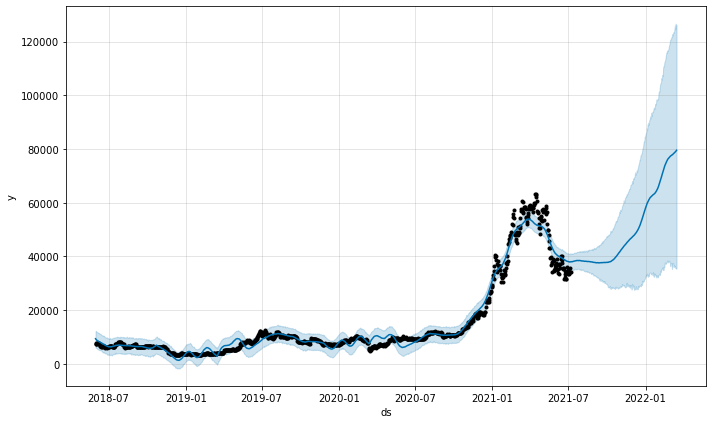

In [106]:
# Plot the Prophet predictions for Bitcoin
forecast_plot_btc = model_btc.plot(forecast_bitcoin)

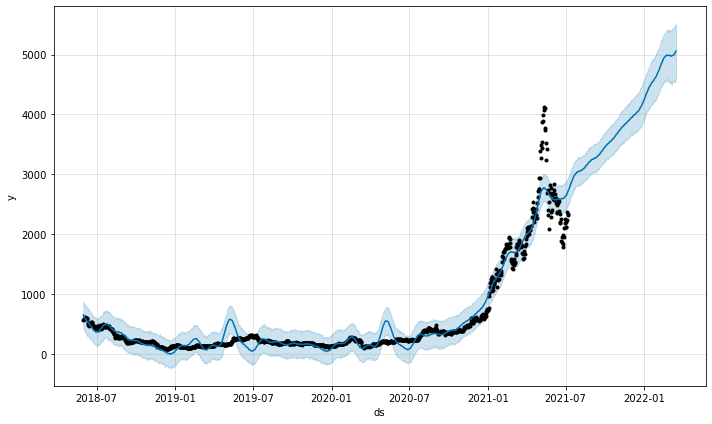

In [107]:
# Plot the Prophet predictions for Ethereum
forecast_plot_eth = model_eth.plot(forecast_ethereum)

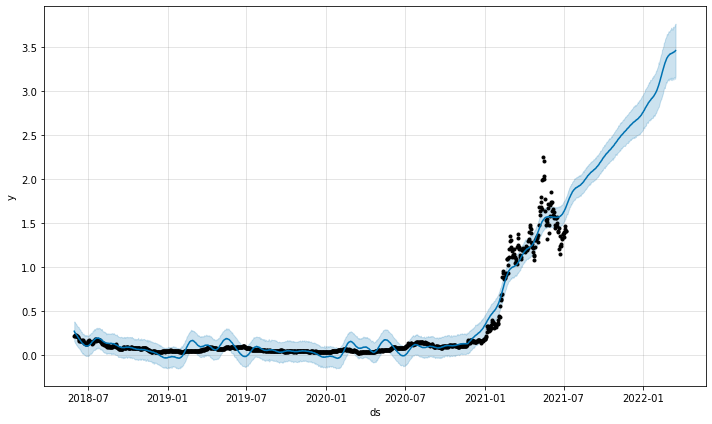

In [108]:
# Plot the Prophet predictions for Cardano
forecast_plot_ada = model_ada.plot(forecast_cardano)

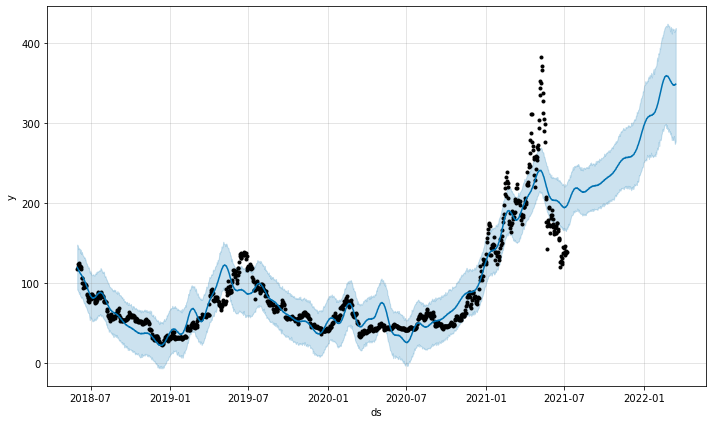

In [109]:
# Plot the Prophet predictions for Litecoin
forecast_plot_ltc = model_ltc.plot(forecast_litecoin)

## Step 7: Analyze the forecast results by plotting the forecast DataFrame's "yhat", "yhat_lower", and "yhat"upper" columns for each the asset models. Set the "ds" column as the DataFrame index before creating these plots.


In [110]:
# Set the index in the forecast_bitcoin DataFrame to the ds datetime column
forecast_bitcoin = forecast_bitcoin.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_bitcoin.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,9111.458905,6070.883001,12230.006273,9111.458905,9111.458905,274.181418,274.181418,274.181418,8.721828,8.721828,8.721828,265.459590,265.459590,265.459590,0.0,0.0,0.0,9385.640323
2018-06-01,9191.815536,6189.631112,12346.210231,9191.815536,9191.815536,-8.435716,-8.435716,-8.435716,-7.748203,-7.748203,-7.748203,-0.687513,-0.687513,-0.687513,0.0,0.0,0.0,9183.379820
2018-06-02,9272.172168,5942.476922,12145.607949,9272.172168,9272.172168,-227.917974,-227.917974,-227.917974,19.684221,19.684221,19.684221,-247.602195,-247.602195,-247.602195,0.0,0.0,0.0,9044.254194
2018-06-03,9352.528799,5799.708861,11876.563695,9352.528799,9352.528799,-519.799083,-519.799083,-519.799083,-42.849604,-42.849604,-42.849604,-476.949479,-476.949479,-476.949479,0.0,0.0,0.0,8832.729716
2018-06-04,9432.885431,5580.236384,11822.163865,9432.885431,9432.885431,-712.976933,-712.976933,-712.976933,-22.380506,-22.380506,-22.380506,-690.596427,-690.596427,-690.596427,0.0,0.0,0.0,8719.908498


In [111]:
# Set the index in the forecast_ethereum DataFrame to the ds datetime column
forecast_ethereum = forecast_ethereum.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_ethereum.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,518.605742,423.511840,868.749425,518.605742,518.605742,135.235844,135.235844,135.235844,2.198607,2.198607,2.198607,133.037237,133.037237,133.037237,0.0,0.0,0.0,653.841586
2018-06-01,517.085477,411.325735,863.940570,517.085477,517.085477,114.922519,114.922519,114.922519,-4.430618,-4.430618,-4.430618,119.353137,119.353137,119.353137,0.0,0.0,0.0,632.007996
2018-06-02,515.565211,394.403442,829.265300,515.565211,515.565211,103.592114,103.592114,103.592114,-3.215592,-3.215592,-3.215592,106.807706,106.807706,106.807706,0.0,0.0,0.0,619.157325
2018-06-03,514.044946,378.850078,823.323801,514.044946,514.044946,92.293739,92.293739,92.293739,-3.026989,-3.026989,-3.026989,95.320728,95.320728,95.320728,0.0,0.0,0.0,606.338684
2018-06-04,512.524680,365.021744,816.015469,512.524680,512.524680,85.879177,85.879177,85.879177,1.089582,1.089582,1.089582,84.789594,84.789594,84.789594,0.0,0.0,0.0,598.403857


In [112]:
# Set the index in the forecast_cardano DataFrame to the ds datetime column
forecast_cardano = forecast_cardano.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_cardano.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,0.157334,0.154688,0.380160,0.157334,0.157334,0.111155,0.111155,0.111155,0.002805,0.002805,0.002805,0.108351,0.108351,0.108351,0.0,0.0,0.0,0.268490
2018-06-01,0.157078,0.148256,0.374145,0.157078,0.157078,0.099986,0.099986,0.099986,-0.001198,-0.001198,-0.001198,0.101184,0.101184,0.101184,0.0,0.0,0.0,0.257064
2018-06-02,0.156822,0.134177,0.364769,0.156822,0.156822,0.094428,0.094428,0.094428,0.000481,0.000481,0.000481,0.093947,0.093947,0.093947,0.0,0.0,0.0,0.251250
2018-06-03,0.156565,0.130175,0.358471,0.156565,0.156565,0.087336,0.087336,0.087336,0.000669,0.000669,0.000669,0.086667,0.086667,0.086667,0.0,0.0,0.0,0.243902
2018-06-04,0.156309,0.121811,0.352978,0.156309,0.156309,0.077265,0.077265,0.077265,-0.002103,-0.002103,-0.002103,0.079368,0.079368,0.079368,0.0,0.0,0.0,0.233574


In [113]:
# Set the index in the forecast_litecoin DataFrame to the ds datetime column
forecast_litecoin = forecast_litecoin.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_litecoin.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,112.471491,91.674014,148.155579,112.471491,112.471491,7.159854,7.159854,7.159854,-0.365881,-0.365881,-0.365881,7.525735,7.525735,7.525735,0.0,0.0,0.0,119.631345
2018-06-01,112.136844,91.735485,146.790616,112.136844,112.136844,6.213944,6.213944,6.213944,-0.164624,-0.164624,-0.164624,6.378568,6.378568,6.378568,0.0,0.0,0.0,118.350788
2018-06-02,111.802197,89.773612,145.217185,111.802197,111.802197,5.848990,5.848990,5.848990,0.475843,0.475843,0.475843,5.373147,5.373147,5.373147,0.0,0.0,0.0,117.651187
2018-06-03,111.467550,88.866869,142.162856,111.467550,111.467550,4.436921,4.436921,4.436921,-0.060102,-0.060102,-0.060102,4.497022,4.497022,4.497022,0.0,0.0,0.0,115.904471
2018-06-04,111.132902,86.353329,143.565812,111.132902,111.132902,3.581617,3.581617,3.581617,-0.153490,-0.153490,-0.153490,3.735107,3.735107,3.735107,0.0,0.0,0.0,114.714519


In [114]:
# Plot predictions for our 252 day peiods for bitcoin
forecast_bitcoin[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [115]:
# Plot predictions for our 252 day peiods for ethereum
forecast_ethereum[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [116]:
# Plot predictions for our 252 day peiods for cardano
forecast_cardano[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [117]:
# Plot predictions for our 252 day peiods for litecoin
forecast_litecoin[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

# Step 8: Use the ```plot_component``` funtion from Prophet models to analyze the patterns of the Google Trends times series data for the assets models. Bes sure to reset the index by converting "ds" back to a column before creating these plots. 

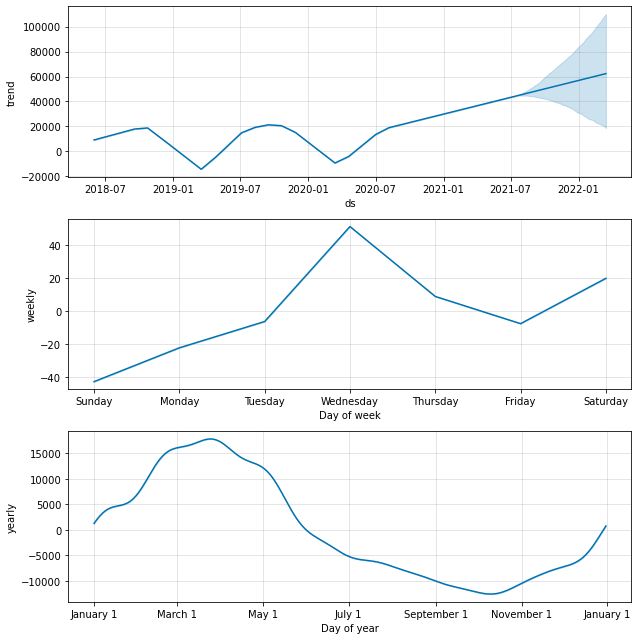

In [118]:
# Reset the index in the forecast_bitcoin DataFrame
forecast_bitcoin = forecast_bitcoin.reset_index()

# Use the plot_components function to visualize the forexast results
# for the forecast_bitcoin DataFrame
plot_btc_components = model_btc.plot_components(forecast_bitcoin)

# Calculate correlation between Cryptocurrencias


## Slice columns with names for merging

In [119]:
new_btc_df = btc_df.loc[:, ["Currency","Closing Price (USD)"]]


In [120]:
new_eth_df = eth_df.loc[:, ["Currency","Closing Price (USD)"]]

In [121]:
new_ada_df = ada_df.loc[:, ["Currency","Closing Price (USD)"]]

In [122]:
new_ltc_df = ltc_df.loc[:, ["Currency","Closing Price (USD)"]]

In [123]:
closing_prices_df = [new_btc_df, new_eth_df, new_ada_df, new_ltc_df]


In [124]:
crypto_concat_df = pd.concat(closing_prices_df)
crypto_concat_df.head()

,Currency,Closing Price (USD)
Date,,
2013-09-30,BTC,123.65499
2013-10-01,BTC,125.45500
2013-10-02,BTC,108.58483
2013-10-03,BTC,118.67466
2013-10-04,BTC,121.33866


In [125]:
# Use using Pandas `pivot` function to unify columns
crypto_currencies_closing_prices_df = crypto_concat_df.pivot(columns="Currency")
crypto_currencies_closing_prices_df.tail().dropna()

Closing Price (USD)                                       
Currency                   ADA           BTC          ETH         LTC
Date                                                                 
2021-07-03            1.397655  34404.927059  2197.431796  138.496294
2021-07-04            1.465641  35601.865473  2366.401502  146.401333
2021-07-05            1.425020  34096.894280  2236.698011  139.996160
2021-07-06            1.406812  34047.547617  2313.509151  138.093300
2021-07-07            1.410606  34206.494528  2330.379929  138.474943

In [126]:
return_crypto_currencies = crypto_currencies_closing_prices_df.pct_change().dropna()
return_crypto_currencies.head()

Closing Price (USD)                              
Currency                   ADA       BTC       ETH       LTC
Date                                                        
2018-06-01            0.000942  0.003700  0.011196  0.020937
2018-06-02            0.038715  0.014906  0.024467  0.027415
2018-06-03           -0.004691  0.011237  0.045523  0.017389
2018-06-04           -0.058626 -0.027288 -0.043270 -0.046611
2018-06-05            0.026006  0.015801  0.027522  0.021391

In [127]:
correlation_cryptocurrencies = return_crypto_currencies.corr()
correlation_cryptocurrencies

Closing Price (USD)                              
Currency                                     ADA       BTC       ETH       LTC
                    Currency                                                  
Closing Price (USD) ADA                 1.000000  0.640635  0.701993  0.685415
                    BTC                 0.640635  1.000000  0.787978  0.790079
                    ETH                 0.701993  0.787978  1.000000  0.816560
                    LTC                 0.685415  0.790079  0.816560  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

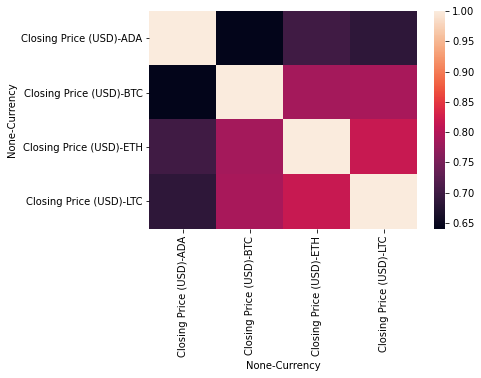

In [129]:
sns.heatmap(correlation_cryptocurrencies)

## Algo Trader for BTC

In [130]:
# With the sliced data frame add a column for the actual returns
btc_sliced_df['Actual Returns'] = btc_sliced_df['Closing Price (USD)'].pct_change()

# Drop NaN values
btc_sliced_df = btc_sliced_df.dropna()

# Review the DataFrame
display(btc_sliced_df.head())

,Closing Price (USD),Actual Returns
Date,,
2018-06-01,7518.333329,0.003700
2018-06-02,7630.403388,0.014906
2018-06-03,7716.145068,0.011237
2018-06-04,7505.589277,-0.027288
2018-06-05,7624.187971,0.015801


In [131]:
# Set the short and long window 
short_window = 5
long_window = 100

# Generate the fast and slow simple moving averages (5 and 100 days)
btc_sliced_df['SMA_Fast'] = btc_sliced_df['Closing Price (USD)'].rolling(window=short_window).mean()
btc_sliced_df['SMA_Slow'] = btc_sliced_df['Closing Price (USD)'].rolling(window=long_window).mean()

# Drop NAN values
btc_sliced_df = btc_sliced_df.dropna()

# Review DataFrame
display(btc_sliced_df.head())

,Closing Price (USD),Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2018-09-08,6181.744207,-0.034143,6665.578735,6873.546628
2018-09-09,6253.937201,0.011678,6444.111802,6860.902666
2018-09-10,6275.083132,0.003381,6316.505426,6847.349464
2018-09-11,6275.669588,0.000093,6277.340567,6832.944709
2018-09-12,6277.494409,0.000291,6252.785708,6820.663760


In [133]:
# Initialize the new signal column
btc_sliced_df['Signal'] = 0.0

# When Actual Returns are Greater than or Equal to 0, generate a signal to buy the crypto long
btc_sliced_df.loc[(btc_sliced_df['Actual Returns'] >= 0), 'Signal'] = 1


# When Actual Returns are less than 0, generate a signal to sell the crypto short
btc_sliced_df.loc[(btc_sliced_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(btc_sliced_df.head())
display(btc_sliced_df.tail())

,Closing Price (USD),Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2018-09-08,6181.744207,-0.034143,6665.578735,6873.546628,-1.0
2018-09-09,6253.937201,0.011678,6444.111802,6860.902666,1.0
2018-09-10,6275.083132,0.003381,6316.505426,6847.349464,1.0
2018-09-11,6275.669588,0.000093,6277.340567,6832.944709,1.0
2018-09-12,6277.494409,0.000291,6252.785708,6820.663760,1.0


,Closing Price (USD),Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2021-07-03,34404.927059,0.026190,34453.342736,46691.438368,1.0
2021-07-04,35601.865473,0.034790,34384.558459,46502.626565,1.0
2021-07-05,34096.894280,-0.042272,34232.808412,46281.251947,-1.0
2021-07-06,34047.547617,-0.001447,34335.617553,46068.288165,-1.0
2021-07-07,34206.494528,0.004668,34471.545792,45834.076318,1.0


In [134]:
# Count the signals values
btc_sliced_df['Signal'].value_counts()

 1.0    558
-1.0    476
Name: Signal, dtype: int64

In [136]:
# Calculate the strategy returns and add them to the btc_sliced_df DataFrame
btc_sliced_df['Strategy Returns'] = btc_sliced_df['Actual Returns'] * btc_sliced_df['Signal'].shift()

# Review the DataFrame
display(btc_sliced_df.head())
display(btc_sliced_df.tail())

,Closing Price (USD),Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2018-09-08,6181.744207,-0.034143,6665.578735,6873.546628,-1.0,NaN
2018-09-09,6253.937201,0.011678,6444.111802,6860.902666,1.0,-0.011678
2018-09-10,6275.083132,0.003381,6316.505426,6847.349464,1.0,0.003381
2018-09-11,6275.669588,0.000093,6277.340567,6832.944709,1.0,0.000093
2018-09-12,6277.494409,0.000291,6252.785708,6820.663760,1.0,0.000291


,Closing Price (USD),Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-07-03,34404.927059,0.026190,34453.342736,46691.438368,1.0,-0.026190
2021-07-04,35601.865473,0.034790,34384.558459,46502.626565,1.0,0.034790
2021-07-05,34096.894280,-0.042272,34232.808412,46281.251947,-1.0,-0.042272
2021-07-06,34047.547617,-0.001447,34335.617553,46068.288165,-1.0,0.001447
2021-07-07,34206.494528,0.004668,34471.545792,45834.076318,1.0,-0.004668


<AxesSubplot:xlabel='Date'>

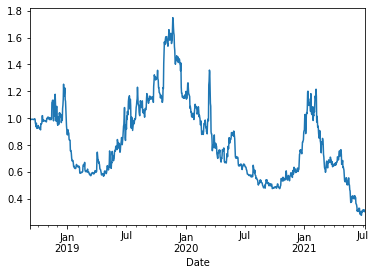

In [137]:
# Plot Strategy Returns to examine performance
(1 + btc_sliced_df['Strategy Returns']).cumprod().plot()

In [138]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = btc_sliced_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
Date,,
2018-09-09,6665.578735,6873.546628
2018-09-10,6444.111802,6860.902666
2018-09-11,6316.505426,6847.349464
2018-09-12,6277.340567,6832.944709
2018-09-13,6252.785708,6820.663760


In [139]:
# Create the target set selecting the Signal column and assiging it to y
y = btc_sliced_df['Signal']

# Review the value counts
y.value_counts()

 1.0    558
-1.0    476
Name: Signal, dtype: int64

In [140]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2018-09-09 00:00:00


In [141]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=4)

# Display the training end date
print(training_end)

2019-01-09 00:00:00


In [142]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2018-09-09,6665.578735,6873.546628
2018-09-10,6444.111802,6860.902666
2018-09-11,6316.505426,6847.349464
2018-09-12,6277.340567,6832.944709
2018-09-13,6252.785708,6820.663760


In [143]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2018-09-09,6665.578735,6873.546628
2018-09-10,6444.111802,6860.902666
2018-09-11,6316.505426,6847.349464
2018-09-12,6277.340567,6832.944709
2018-09-13,6252.785708,6820.663760


In [144]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [145]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [146]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.17      0.00      0.00       418
         1.0       0.54      0.99      0.70       492

    accuracy                           0.54       910
   macro avg       0.35      0.50      0.35       910
weighted avg       0.37      0.54      0.38       910



In [148]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = btc_sliced_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = btc_sliced_df['Strategy Returns']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2019-01-10,1.0,-0.094605,-0.094605
2019-01-11,1.0,-0.003091,0.003091
2019-01-12,1.0,0.001487,-0.001487
2019-01-13,1.0,-0.031527,-0.031527
2019-01-14,1.0,0.044795,-0.044795


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-07-03,1.0,0.026190,-0.026190
2021-07-04,1.0,0.034790,0.034790
2021-07-05,1.0,-0.042272,-0.042272
2021-07-06,1.0,-0.001447,0.001447
2021-07-07,1.0,0.004668,-0.004668


<AxesSubplot:xlabel='Date'>

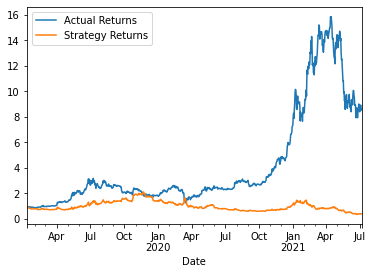

In [149]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot()

In [151]:
# Import a new classifier from SKLearn
from sklearn.naive_bayes import GaussianNB

# Initiate the model instance
gnb = GaussianNB()

# Fit the model using the training data
gnb = gnb.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = gnb.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [152]:
# Use a classification report to evaluate the model using the predictions and testing data
gnb_testing_report = classification_report(y_test, pred)

# Print the classification report
print(gnb_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       418
         1.0       0.54      1.00      0.70       492

    accuracy                           0.54       910
   macro avg       0.27      0.50      0.35       910
weighted avg       0.29      0.54      0.38       910



In [153]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
gnb_predictions_df = pd.DataFrame(index=X_test.index)

# Add the Logistic Regression model predictions to the DataFrame
gnb_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
gnb_predictions_df['Actual Returns'] = btc_sliced_df["Actual Returns"]

# Add the strategy returns to the DataFrame
gnb_predictions_df['Strategy Returns'] = btc_sliced_df['Strategy Returns']

# Review the DataFrame
display(gnb_predictions_df.head())
display(gnb_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2019-01-10,1.0,-0.094605,-0.094605
2019-01-11,1.0,-0.003091,0.003091
2019-01-12,1.0,0.001487,-0.001487
2019-01-13,1.0,-0.031527,-0.031527
2019-01-14,1.0,0.044795,-0.044795


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-07-03,1.0,0.026190,-0.026190
2021-07-04,1.0,0.034790,0.034790
2021-07-05,1.0,-0.042272,-0.042272
2021-07-06,1.0,-0.001447,0.001447
2021-07-07,1.0,0.004668,-0.004668


<AxesSubplot:xlabel='Date'>

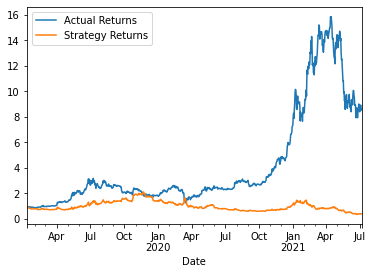

In [154]:
# Plot the actual returns versus the strategy returns
(1 + gnb_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot()